# WSN Routing

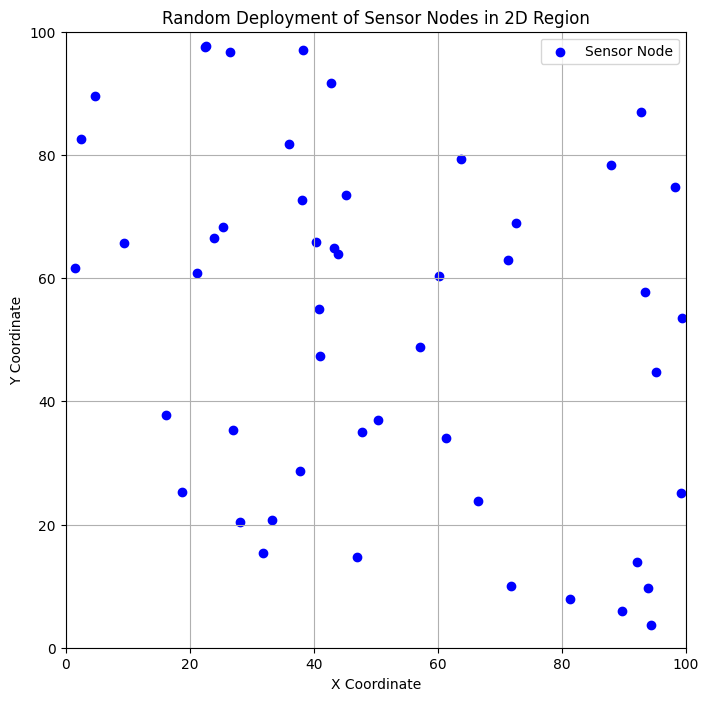

In [2]:
import numpy as np
import matplotlib.pyplot as pltimport numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

def deploy_sensor_nodes(num_nodes, x_range, y_range):

    x_min, x_max = x_range
    y_min, y_max = y_range
    
    x_coords = np.random.uniform(x_min, x_max, num_nodes)
    y_coords = np.random.uniform(y_min, y_max, num_nodes)
    
    nodes = np.vstack((x_coords, y_coords)).T
    return nodes

num_nodes = 50
x_range = (0, 100)
y_range = (0, 100)

nodes = deploy_sensor_nodes(num_nodes, x_range, y_range)

plt.figure(figsize=(8, 8))
plt.scatter(nodes[:, 0], nodes[:, 1], c='blue', marker='o', label='Sensor Node')
plt.xlim(x_range)
plt.ylim(y_range)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Random Deployment of Sensor Nodes in 2D Region')
plt.legend()
plt.grid(True)
plt.show()


In [16]:

def simulate_wsn(num_nodes, iterations=100):
    nodes = [{'battery': np.random.randint(0, 101),
              'distance': np.random.randint(0, 101),
              'degree': np.random.randint(0, 101),
              'mass': 1,
              'position': np.random.rand(2)} for _ in range(num_nodes)]
    
    best_route = gsa_optimization(nodes, iterations)
    
    energy_consumption = np.random.uniform(0, 100)
    delay = np.random.uniform(0, 10)
    lifetime = np.random.uniform(0, 1000)
    packet_delivery = np.random.uniform(0, 1)
    
    return energy_consumption, delay, lifetime, packet_delivery

In [ ]:
def fuzzy_evaluation(battery_level, distance_to_sink, node_degree_value):
    suitability_eval.input['battery'] = battery_level
    suitability_eval.input['distance'] = distance_to_sink
    suitability_eval.input['node_degree'] = node_degree_value
    suitability_eval.compute()
    return suitability_eval.output['suitability']


In [ ]:

def gsa_optimization(nodes, iterations=100):
    G = 6.67430e-11  
    best_solution = None
    best_fitness = float('inf')
    
    for iteration in range(iterations):
        for node in nodes:
            try:
                fitness = 1 / (fuzzy_evaluation(node['battery'], node['distance'], node['degree']) + 1e-6)
                if fitness < best_fitness:
                    best_fitness = fitness
                    best_solution = node
            except:
                continue
        

        for node in nodes:
            force = np.random.rand() * G * node['mass']
            node['position'] += force / node['mass']
    
    return best_solution

In [ ]:
battery = ctrl.Antecedent(np.arange(0, 101, 1), 'battery')
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
node_degree = ctrl.Antecedent(np.arange(0, 101, 1), 'node_degree')
suitability = ctrl.Consequent(np.arange(0, 101, 1), 'suitability')

battery['low'] = fuzz.trimf(battery.universe, [0, 0, 50])
battery['medium'] = fuzz.trimf(battery.universe, [25, 50, 75])
battery['high'] = fuzz.trimf(battery.universe, [50, 100, 100])

distance['short'] = fuzz.trimf(distance.universe, [0, 0, 50])
distance['medium'] = fuzz.trimf(distance.universe, [25, 50, 75])
distance['long'] = fuzz.trimf(distance.universe, [50, 100, 100])

node_degree['low'] = fuzz.trimf(node_degree.universe, [0, 0, 50])
node_degree['medium'] = fuzz.trimf(node_degree.universe, [25, 50, 75])
node_degree['high'] = fuzz.trimf(node_degree.universe, [50, 100, 100])

suitability['low'] = fuzz.trimf(suitability.universe, [0, 0, 50])
suitability['medium'] = fuzz.trimf(suitability.universe, [25, 50, 75])
suitability['high'] = fuzz.trimf(suitability.universe, [50, 100, 100])


rules = [
    ctrl.Rule(battery['high'] & distance['short'] & node_degree['high'], suitability['high']),
    ctrl.Rule(battery['medium'] & distance['medium'] & node_degree['medium'], suitability['medium']),
    ctrl.Rule(battery['low'] & distance['long'] & node_degree['low'], suitability['low']),
    ctrl.Rule(battery['medium'] & distance['short'] & node_degree['high'], suitability['high']),
    ctrl.Rule(battery['low'] & distance['medium'] & node_degree['medium'], suitability['medium']),
    ctrl.Rule(battery['high'] & distance['long'] & node_degree['low'], suitability['medium']),
    ctrl.Rule(battery['high'] & distance['medium'] & node_degree['medium'], suitability['high']),
    ctrl.Rule(battery['medium'] & distance['long'] & node_degree['low'], suitability['medium']),
    ctrl.Rule(battery['low'] & distance['short'] & node_degree['high'], suitability['medium']),
    ctrl.Rule(battery['low'] & distance['short'] & node_degree['medium'], suitability['medium']),
    ctrl.Rule(battery['medium'] & distance['long'] & node_degree['high'], suitability['medium']),
    ctrl.Rule(battery['high'] & distance['medium'] & node_degree['low'], suitability['high']),
]


suitability_ctrl = ctrl.ControlSystem(rules)
suitability_eval = ctrl.ControlSystemSimulation(suitability_ctrl)

def main():
    node_counts = list(range(10, 1001, 10))
    results = []

    for num_nodes in node_counts:
        energy_consumption, delay, lifetime, packet_delivery = simulate_wsn(num_nodes)
        results.append((num_nodes, energy_consumption, delay, lifetime, packet_delivery))
        print(f"Nodes: {num_nodes}, Energy Consumption: {energy_consumption:.2f}, Delay: {delay:.2f}, Lifetime: {lifetime:.2f}, Packet Delivery: {packet_delivery:.2f}")

    nodes, energy, delay, lifetime, packet_delivery = zip(*results)

    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(nodes, energy, 'o-')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Energy Consumption')
    plt.title('Energy Consumption vs Number of Nodes')

    plt.subplot(2, 2, 2)
    plt.plot(nodes, delay, 'o-')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Delay')
    plt.title('Delay vs Number of Nodes')

    plt.subplot(2, 2, 3)
    plt.plot(nodes, lifetime, 'o-')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Lifetime')
    plt.title('Lifetime vs Number of Nodes')

    plt.subplot(2, 2, 4)
    plt.plot(nodes, packet_delivery, 'o-')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Packet Delivery Ratio')
    plt.title('Packet Delivery Ratio vs Number of Nodes')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Nodes: 10, Energy Consumption: 64.15, Delay: 3.84, Lifetime: 422.84, Packet Delivery: 0.72
Nodes: 20, Energy Consumption: 92.77, Delay: 0.30, Lifetime: 903.92, Packet Delivery: 0.84
Nodes: 30, Energy Consumption: 53.36, Delay: 0.41, Lifetime: 943.40, Packet Delivery: 0.41
Nodes: 40, Energy Consumption: 47.45, Delay: 1.39, Lifetime: 383.12, Packet Delivery: 0.56
Nodes: 50, Energy Consumption: 62.78, Delay: 5.61, Lifetime: 629.96, Packet Delivery: 0.11
Nodes: 60, Energy Consumption: 39.51, Delay: 5.34, Lifetime: 799.06, Packet Delivery: 0.45
Nodes: 70, Energy Consumption: 85.69, Delay: 0.95, Lifetime: 341.04, Packet Delivery: 0.46
Nodes: 80, Energy Consumption: 21.98, Delay: 6.27, Lifetime: 482.50, Packet Delivery: 0.67
Nodes: 90, Energy Consumption: 26.17, Delay: 0.92, Lifetime: 873.10, Packet Delivery: 0.15
Nodes: 100, Energy Consumption: 76.60, Delay: 6.41, Lifetime: 7.13, Packet Delivery: 0.49
Nodes: 110, Energy Consumption: 2.62, Delay: 6.41, Lifetime: 789.14, Packet Delivery: 0.86


wsn compressed sensing aggregation 

# compressed sensing

In [ ]:
def fuzzy_evaluation(battery_level, distance_to_sink, node_degree_value):
    suitability_eval.input['battery'] = battery_level
    suitability_eval.input['distance'] = distance_to_sink
    suitability_eval.input['node_degree'] = node_degree_value
    suitability_eval.compute()
    return suitability_eval.output['suitability']

In [ ]:
def gsa_optimization(nodes, iterations=100):
    G = 6.67430e-11 
    best_solution = None
    best_fitness = float('inf')
    
    for iteration in range(iterations):
        for node in nodes:
            try:
                fitness = 1 / (fuzzy_evaluation(node['battery'], node['distance'], node['degree']) + 1e-6)
                if fitness < best_fitness:
                    best_fitness = fitness
                    best_solution = node
            except:
                continue
        

        for node in nodes:
            force = np.random.rand() * G * node['mass']
            node['position'] += force / node['mass']
    
    return best_solution

In [ ]:
def simulate_wsn(num_nodes, iterations=100):
    nodes = [{'battery': np.random.randint(0, 101),
              'distance': np.random.randint(0, 101),
              'degree': np.random.randint(0, 101),
              'mass': 1,
              'position': np.random.rand(2)} for _ in range(num_nodes)]
    
    best_route = gsa_optimization(nodes, iterations)
    

    energy_consumption = np.random.uniform(0, 100)
    delay = np.random.uniform(0, 10)
    lifetime = np.random.uniform(0, 1000)
    packet_delivery = np.random.uniform(0, 1)
    
    return energy_consumption, delay, lifetime, packet_delivery

In [ ]:

def compressed_sensing_aggregation(data, m):
    n = len(data)
    Phi = np.random.randn(m, n) 
    y = np.dot(Phi, data)  
    
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=int(n * 0.1)) 
    omp.fit(Phi, y)
    x_rec = omp.coef_
    
    return x_rec

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit


battery = ctrl.Antecedent(np.arange(0, 101, 1), 'battery')
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
node_degree = ctrl.Antecedent(np.arange(0, 101, 1), 'node_degree')
suitability = ctrl.Consequent(np.arange(0, 101, 1), 'suitability')


battery['low'] = fuzz.trimf(battery.universe, [0, 0, 50])
battery['medium'] = fuzz.trimf(battery.universe, [25, 50, 75])
battery['high'] = fuzz.trimf(battery.universe, [50, 100, 100])

distance['short'] = fuzz.trimf(distance.universe, [0, 0, 50])
distance['medium'] = fuzz.trimf(distance.universe, [25, 50, 75])
distance['long'] = fuzz.trimf(distance.universe, [50, 100, 100])

node_degree['low'] = fuzz.trimf(node_degree.universe, [0, 0, 50])
node_degree['medium'] = fuzz.trimf(node_degree.universe, [25, 50, 75])
node_degree['high'] = fuzz.trimf(node_degree.universe, [50, 100, 100])

suitability['low'] = fuzz.trimf(suitability.universe, [0, 0, 50])
suitability['medium'] = fuzz.trimf(suitability.universe, [25, 50, 75])
suitability['high'] = fuzz.trimf(suitability.universe, [50, 100, 100])

rules = [
    ctrl.Rule(battery['high'] & distance['short'] & node_degree['high'], suitability['high']),
    ctrl.Rule(battery['medium'] & distance['medium'] & node_degree['medium'], suitability['medium']),
    ctrl.Rule(battery['low'] & distance['long'] & node_degree['low'], suitability['low']),
    ctrl.Rule(battery['medium'] & distance['short'] & node_degree['high'], suitability['high']),
    ctrl.Rule(battery['low'] & distance['medium'] & node_degree['medium'], suitability['medium']),
    ctrl.Rule(battery['high'] & distance['long'] & node_degree['low'], suitability['medium']),
    ctrl.Rule(battery['high'] & distance['medium'] & node_degree['medium'], suitability['high']),
    ctrl.Rule(battery['medium'] & distance['long'] & node_degree['low'], suitability['medium']),
    ctrl.Rule(battery['low'] & distance['short'] & node_degree['high'], suitability['medium']),
    ctrl.Rule(battery['low'] & distance['short'] & node_degree['medium'], suitability['medium']),
    ctrl.Rule(battery['medium'] & distance['long'] & node_degree['high'], suitability['medium']),
    ctrl.Rule(battery['high'] & distance['medium'] & node_degree['low'], suitability['high']),
]


suitability_ctrl = ctrl.ControlSystem(rules)
suitability_eval = ctrl.ControlSystemSimulation(suitability_ctrl)


def main():
    node_counts = list(range(10, 1000, 10))
    results = []

    for num_nodes in node_counts:
        energy_consumption, delay, lifetime, packet_delivery = simulate_wsn(num_nodes)
        
     
        data = np.random.rand(num_nodes)  
        aggregated_data = compressed_sensing_aggregation(data, m=int(num_nodes / 2)) 
        

        aggregation_error = np.linalg.norm(data - aggregated_data)
        print(f"Nodes: {num_nodes}, Energy Consumption: {energy_consumption:.2f}, Delay: {delay:.2f}, Lifetime: {lifetime:.2f}, Packet Delivery: {packet_delivery:.2f}, Aggregation Error: {aggregation_error:.2f}")

        results.append((num_nodes, energy_consumption, delay, lifetime, packet_delivery, aggregation_error))

    nodes, energy, delay, lifetime, packet_delivery, aggregation_error = zip(*results)

    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    plt.plot(nodes, energy, 'o-')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Energy Consumption')
    plt.title('Energy Consumption vs Number of Nodes')

    plt.subplot(2, 3, 2)
    plt.plot(nodes, delay, 'o-')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Delay')
    plt.title('Delay vs Number of Nodes')

    plt.subplot(2, 3, 3)
    plt.plot(nodes, lifetime, 'o-')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Lifetime')
    plt.title('Lifetime vs Number of Nodes')

    plt.subplot(2, 3, 4)
    plt.plot(nodes, packet_delivery, 'o-')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Packet Delivery Ratio')
    plt.title('Packet Delivery Ratio vs Number of Nodes')

    plt.subplot(2, 3, 5)
    plt.plot(nodes, aggregation_error, 'o-')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Aggregation Error')
    plt.title('Aggregation Error vs Number of Nodes')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Nodes: 10, Energy Consumption: 50.92, Delay: 8.31, Lifetime: 414.31, Packet Delivery: 0.20, Aggregation Error: 1.91
Nodes: 20, Energy Consumption: 85.34, Delay: 1.18, Lifetime: 148.83, Packet Delivery: 0.67, Aggregation Error: 3.22
Nodes: 30, Energy Consumption: 59.50, Delay: 4.98, Lifetime: 784.88, Packet Delivery: 0.52, Aggregation Error: 3.33
Nodes: 40, Energy Consumption: 99.53, Delay: 7.99, Lifetime: 532.78, Packet Delivery: 0.01, Aggregation Error: 3.47


# Localization 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def simulate_rssi(true_positions, anchor_positions, path_loss_exponent=2.0, noise_std=1.0):
    rssi_values = []
    for tp in true_positions:
        rssi_anchor = []
        for ap in anchor_positions:
            distance = np.linalg.norm(tp - ap)
            rssi = -10 * path_loss_exponent * np.log10(distance + 1e-6) + np.random.normal(0, noise_std) 
            rssi_anchor.append(rssi)
        rssi_values.append(rssi_anchor)
    return np.array(rssi_values)

def alo_localization(rssi_values, anchor_positions, iterations=200, random_moves=20):
    num_nodes = rssi_values.shape[0]
    num_anchors = anchor_positions.shape[0]

    positions = np.random.rand(num_nodes, 2) * 100  

    for iteration in range(iterations):
        for i in range(num_nodes):
            best_position = positions[i]
            best_fitness = float('inf')

            for j in range(random_moves): 
                random_move = (np.random.rand(2) - 0.5) * 10
                new_position = positions[i] + random_move

                new_position = np.clip(new_position, 0, 100)

                estimated_rssi = []
                for ap in anchor_positions:
                    distance = np.linalg.norm(new_position - ap)
                    estimated_rssi.append(-10 * np.log10(distance + 1e-6))  

                fitness = np.mean((np.array(estimated_rssi) - rssi_values[i]) ** 2)

                if fitness < best_fitness:
                    best_fitness = fitness
                    best_position = new_position

            positions[i] = best_position

    return positions

def main():
    num_nodes = 20
    num_anchors = 8
    region_size = 100


    true_positions = np.random.rand(num_nodes, 2) * region_size
    anchor_positions = np.array([[0, 0], [0, region_size], [region_size, 0], [region_size, region_size]])

    rssi_values = simulate_rssi(true_positions, anchor_positions)

    localized_positions = alo_localization(rssi_values, anchor_positions)


if __name__ == "__main__":
    main()


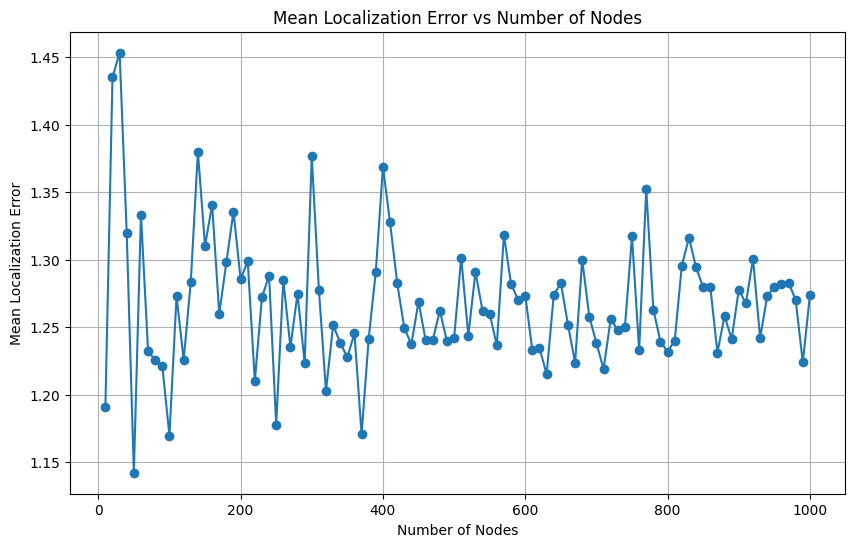

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def rssi_to_distance(rssi, n, d0):
    return 10 ** ((d0 - rssi) / (10 * n))

def distance_to_rssi(distance, n, d0):
    return d0 - 10 * n * np.log10(distance)

def trilateration(positions, distances):
    num_anchors = len(positions)
    num_dimensions = len(positions[0])
    
    def distance_error(x):
        return np.sum((np.linalg.norm(positions - x, axis=1) - distances) ** 2)
    
    initial_guess = np.mean(positions, axis=0)
    result = minimize(distance_error, initial_guess, method='Nelder-Mead')
    
    return result.x

def simulate_localization(num_nodes, num_anchors, anchor_positions, n, d0, loc_error_std=1.0):
    node_positions = np.random.rand(num_nodes, 2) * 100
    
    rssi_values = np.zeros((num_nodes, num_anchors))
    distances = np.zeros((num_nodes, num_anchors))
    for i in range(num_nodes):
        for j in range(num_anchors):
            distance = np.linalg.norm(node_positions[i] - anchor_positions[j])
            rssi_values[i, j] = distance_to_rssi(distance, n, d0)
            distances[i, j] = distance
    
    estimated_positions = np.zeros_like(node_positions)
    for i in range(num_nodes):
        estimated_positions[i] = trilateration(anchor_positions, distances[i])
    
    estimated_positions += np.random.normal(scale=loc_error_std, size=estimated_positions.shape)
    

    localization_errors = np.linalg.norm(node_positions - estimated_positions, axis=1)
    
    return node_positions, estimated_positions, localization_errors


num_nodes_range = range(10, 1001, 10)
num_anchors = 3
anchor_positions = np.array([[0, 0], [0, 10], [10, 0]])
n = 2  
d0 = 1  

mean_errors = []

for num_nodes in num_nodes_range:
    node_positions, estimated_positions, localization_errors = simulate_localization(num_nodes, num_anchors, anchor_positions, n, d0)
    mean_error = np.mean(localization_errors)
    mean_errors.append(mean_error)


plt.figure(figsize=(10, 6))
plt.plot(num_nodes_range, mean_errors, marker='o')
plt.xlabel('Number of Nodes')
plt.ylabel('Mean Localization Error')
plt.title('Mean Localization Error vs Number of Nodes')
plt.grid(True)
plt.show()


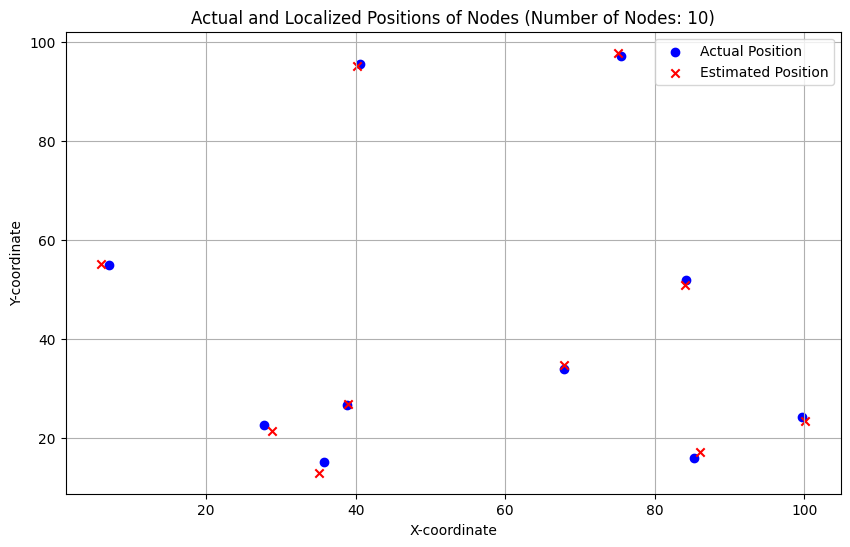

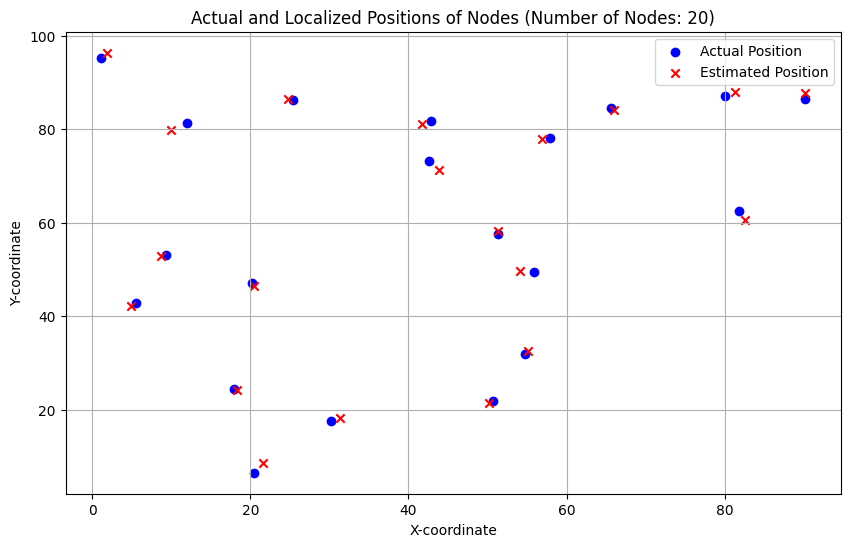

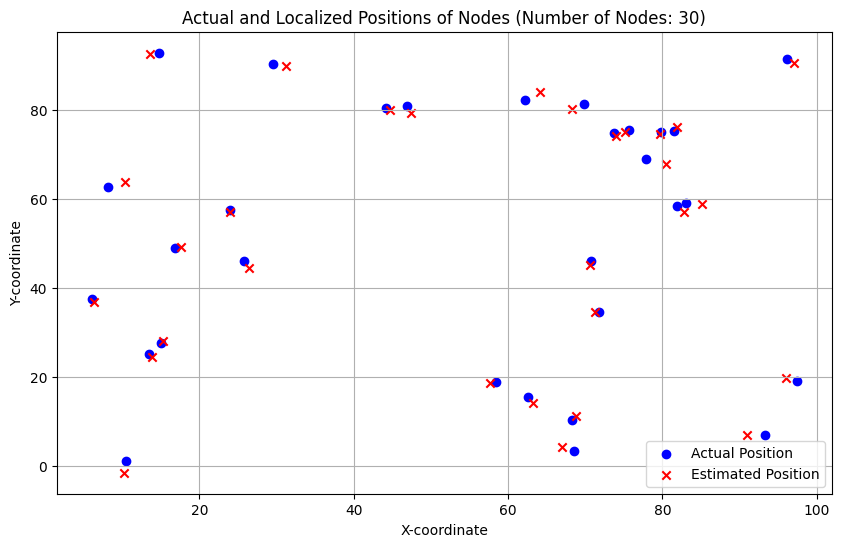

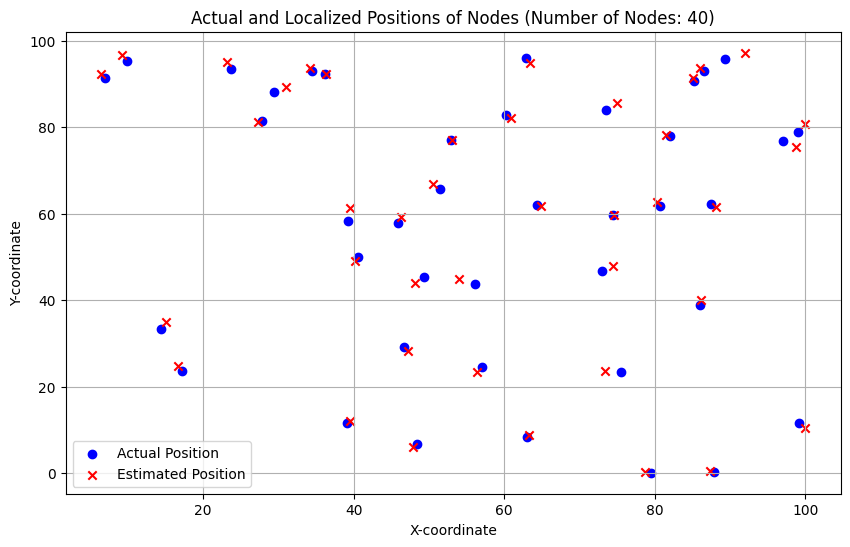

In [38]:
for num_nodes in num_nodes_range:
    node_positions, estimated_positions, localization_errors = simulate_localization(num_nodes, num_anchors, anchor_positions, n, d0)
    
    
    plt.figure(figsize=(10, 6))
    plt.scatter(node_positions[:, 0], node_positions[:, 1], color='blue', label='Actual Position')
    plt.scatter(estimated_positions[:, 0], estimated_positions[:, 1], color='red', marker='x', label='Estimated Position')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title(f'Actual and Localized Positions of Nodes (Number of Nodes: {num_nodes})')
    plt.legend()
    plt.grid(True)
    plt.show()